# Accuracy

This benchmark focuses on comparing the **accuracy** of pyMultiFit's statistical distributions compared to the well-established ``SciPy`` library.
The focus is on ensuring that ``pyMultiFit`` provides reliable results that closely match theoretical values and SciPy outputs, which are widely trusted in the scientific community.

## What is Tested?

- Probability Density Function (PDF): Compares the computed values for given inputs against the expected results and SciPy outputs.
- Cumulative Distribution Function (CDF): Verifies that cumulative probabilities match theoretical predictions and SciPy results.

## Benchmark setup

To test accuracy:
- Both ``pyMultiFit`` and SciPy are run on the same input data, using distributions like Gaussian, Beta, and Laplace.
- Results are compared using metrics such as absolute error, relative error, and visual plots.
- A range of parameter values and edge cases are included to evaluate robustness and consistency.

# TEST 1 $-$ $\mathcal{N}(0, 1)$

The simplest, standard gaussian over a range of values.


In [1]:
import numpy as np
from scipy.stats import norm

from pymultifit.benchmark_functions import compare_accuracy, plot_accuracy
from pymultifit.distributions import GaussianDistribution

In [2]:
np.random.seed(43)

In [3]:
edge_cases = [np.array([0, 1e-10, 1e-5, 1, 1e2, 1e3, 1e4, 1e5, 1e7, 0.5e8, 1e10])]
general_cases = [np.logspace(-10, 10, 5_000)]

custom_dist = GaussianDistribution(normalize=True)
scipy_dist = norm()

True
True


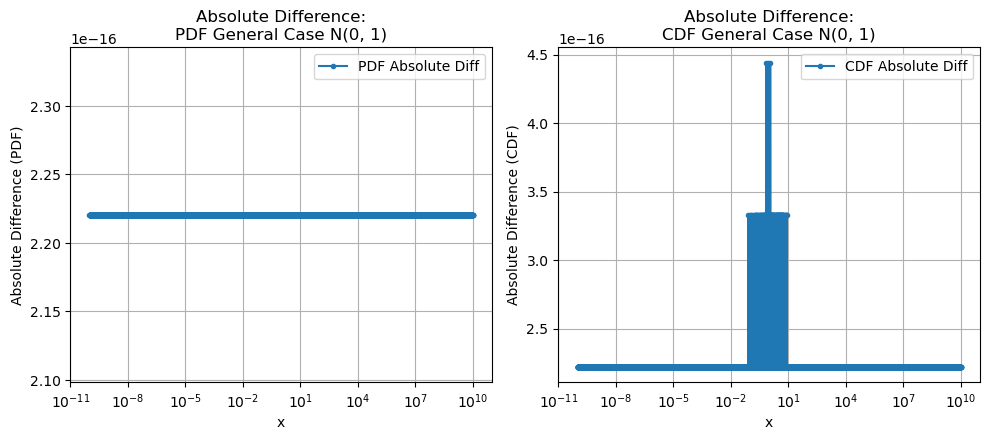

In [4]:
for i, x in enumerate(general_cases):
    print(np.allclose(custom_dist.pdf(x), scipy_dist.pdf(x)))
    print(np.allclose(custom_dist.cdf(x), scipy_dist.cdf(x)))
    accuracy_results = compare_accuracy(x, custom_dist, scipy_dist)
    plot_accuracy(x, accuracy_results, "General Case N(0, 1)")


True
True


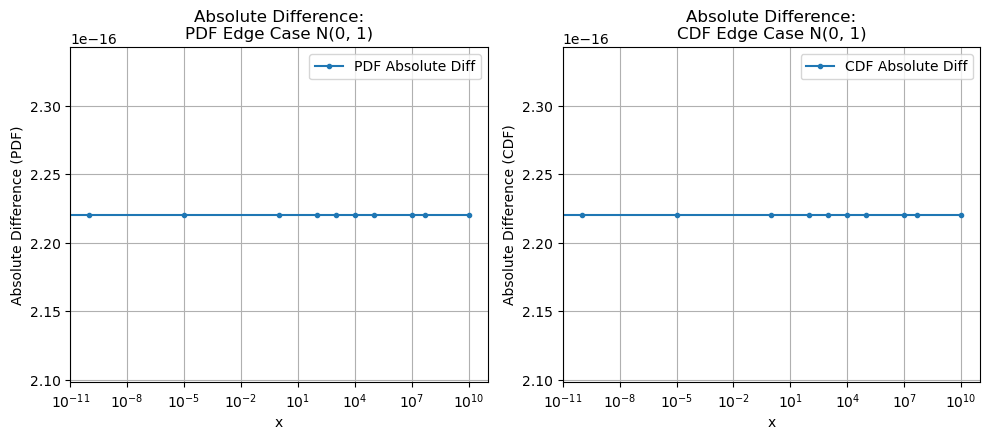

In [5]:
for i, x in enumerate(edge_cases):
    print(np.allclose(custom_dist.pdf(x), scipy_dist.pdf(x)))
    print(np.allclose(custom_dist.cdf(x), scipy_dist.cdf(x)))
    accuracy_results = compare_accuracy(x, custom_dist, scipy_dist)
    plot_accuracy(x, accuracy_results, "Edge Case N(0, 1)")


# TEST 2 $-$ $\mathcal{N}(3, 0.1)$

In [6]:
custom_dist = GaussianDistribution(mean=3, std=0.1, normalize=True)
scipy_dist = norm(loc=3, scale=0.1)

True
True


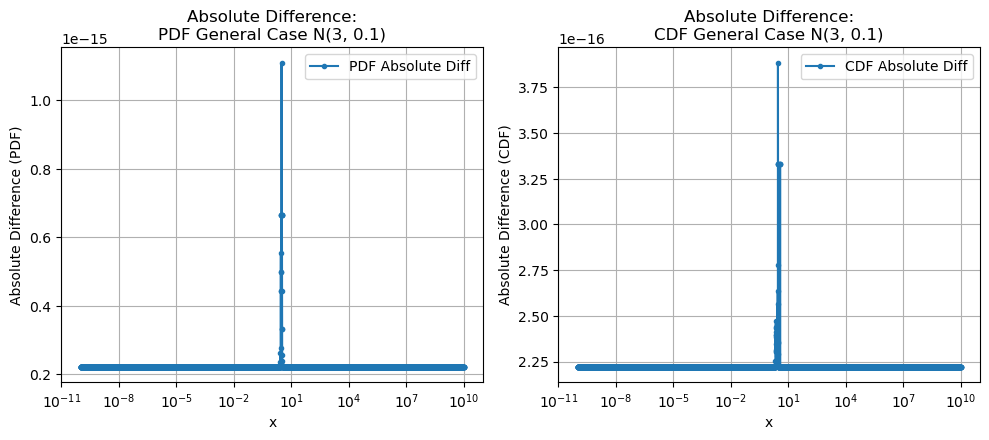

In [7]:
for i, x in enumerate(general_cases):
    print(np.allclose(custom_dist.pdf(x), scipy_dist.pdf(x)))
    print(np.allclose(custom_dist.cdf(x), scipy_dist.cdf(x)))
    accuracy_results = compare_accuracy(x, custom_dist, scipy_dist)
    plot_accuracy(x, accuracy_results, "General Case N(3, 0.1)")

True
True


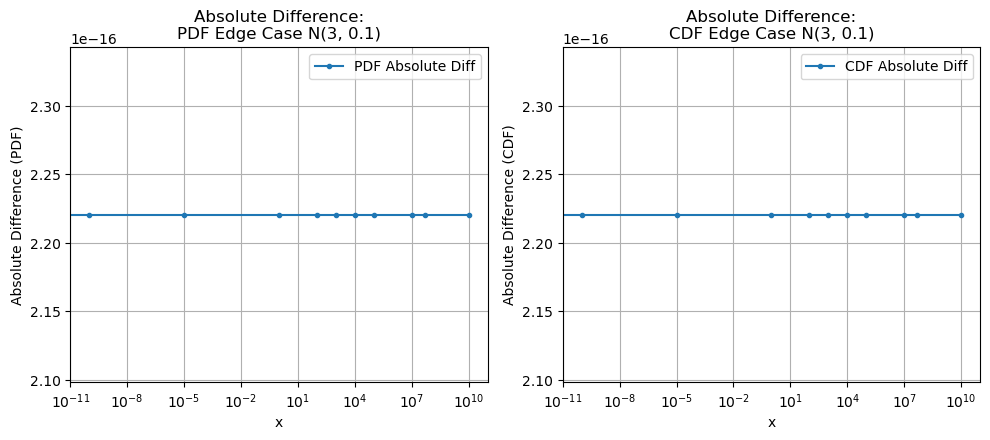

In [8]:
for i, x in enumerate(edge_cases):
    print(np.allclose(custom_dist.pdf(x), scipy_dist.pdf(x)))
    print(np.allclose(custom_dist.cdf(x), scipy_dist.cdf(x)))
    accuracy_results = compare_accuracy(x, custom_dist, scipy_dist)
    plot_accuracy(x, accuracy_results, "Edge Case N(3, 0.1)")